In [182]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris=sns.load_dataset('iris')
print(iris.values)
print(iris.columns)
print(iris.index)

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [5.4 3.4 1.7 0.2 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.1 3.3 1.7 0.5 'setosa']
 [4.8 3.4 1.9 0.2 'setosa']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [5.2 3.5 1.5 0.2 'setosa']
 [5.2 3.4 1.4 0.2 'setosa']
 [4.7 3.2 1.6 0.2 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 4.1 1.5 0.1 'setosa']
 [5.5 4.2 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.2 'setosa']
 [5.0 3.2 1.2 0.2 's

In [183]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [184]:

print('The mean sepal length is '+str(round(iris['sepal_length'].mean(),2))+'cm.')
print('The mean sepal width is '+str(round(iris['sepal_width'].mean(),2))+'cm.')

The mean sepal length is 5.84cm.
The mean sepal width is 3.06cm.


In [185]:
iris_by_species = iris.groupby('species')['petal_length','petal_width','sepal_length','sepal_width'].mean()
iris_by_species.head()

/var/folders/bg/fbxc0vyx0jn3x_c_c5vtr8rh0000gn/T/ipykernel_96202/2913975378.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris_by_species = iris.groupby('species')['petal_length','petal_width','sepal_length','sepal_width'].mean()


,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


Let's check for anomalies in our setosa dataframe.


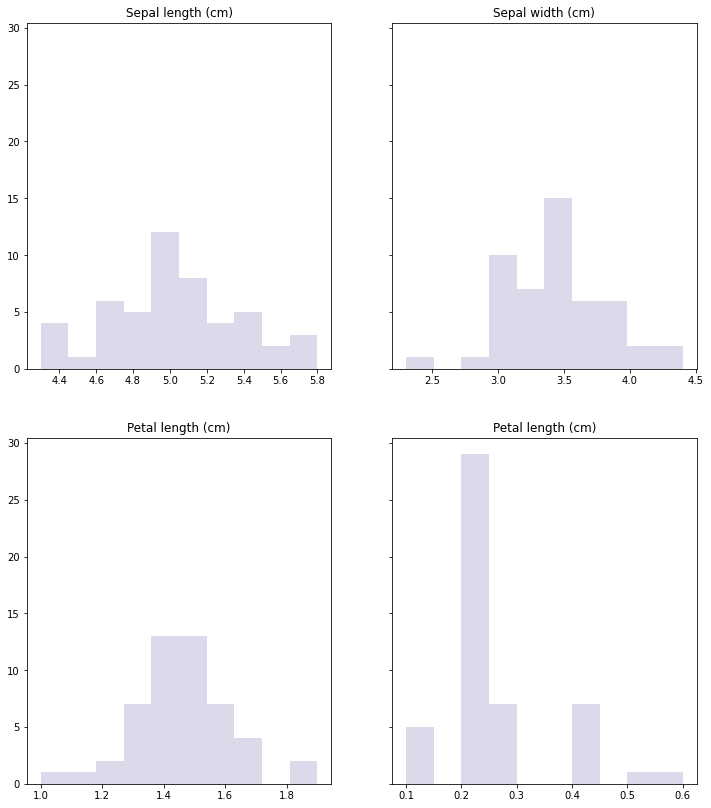

In [186]:
#Checking the setosa data for any anomalies. The distributions seem normal. 
iris_setosa= iris[iris['species']=='setosa']

fig, axs=plt.subplots(2,2,sharey=True,figsize=(12,14))


axs[(0,0)].hist(iris_setosa['sepal_length'])
axs[(0,0)].set_title('Sepal length (cm)')
axs[(0,1)].hist(iris_setosa['sepal_width'])
axs[(0,1)].set_title('Sepal width (cm)')
axs[(1,0)].hist(iris_setosa['petal_length'])
axs[(1,0)].set_title('Petal length (cm)')
axs[(1,1)].hist(iris_setosa['petal_width'])
axs[(1,1)].set_title('Petal length (cm)')

plt.show()


Everything seems normal. Now let's look at the correlations between our columns. Only the sepal width and sepal length have high correlations. 

In [187]:
iris_setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


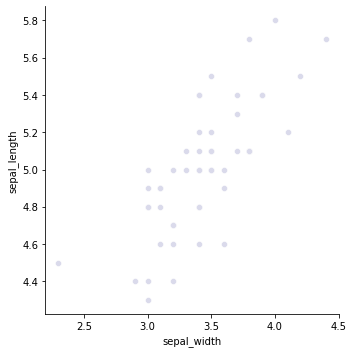

In [188]:
sns.relplot(data=iris_setosa, x='sepal_width',y='sepal_length')

It seems like sepal length and widths are directly proportional. How about the other species' sepals?

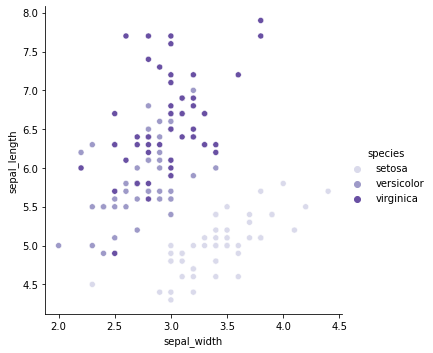

In [189]:
sns.relplot(data=iris, x='sepal_width',y='sepal_length',hue='species')

How are the petal and sepal dimensions of other species relate to each other?

In [190]:
#create dataframes for versicolor and virginica
iris_versicolor= iris[iris['species']=='versicolor']
iris_virginica= iris[iris['species']=='virginica']

In [191]:
iris_versicolor.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [192]:
iris_virginica.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


We can say that setosa, versicolor, and virginica can be distinguished by the shape and size of their petals and sepals. 

Let's say we want to see the relationshipe between petal length and width, together with the overall size of the sepal. We can create a new variable, sepal_area, by multiplying the lengths and widths of the sepals. We then pass these variable onto a relational plot. 

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

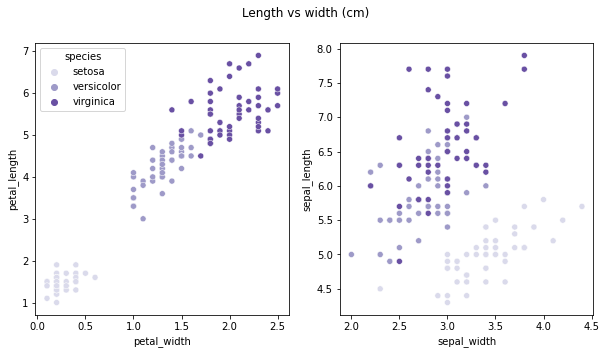

In [204]:
fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=False)
fig.suptitle('Length vs width (cm)')

iris['sepal_area']=iris['sepal_length']*iris['sepal_width']
#irises are purple. Let's use a purple color palette to show our data.

sns.set_palette("Purples",3)
sns.scatterplot(data=iris, x='petal_width',y='petal_length',hue='species',ax=axes[0])

sns.scatterplot(data=iris, x='sepal_width',y='sepal_length',hue='species',ax=axes[1],legend=False)


It seems that we were right about these species being distinguishable by petal shape and size. Setosa is the species with the smallest petals (by a large margin), while virginica is the species with the largest petals, with versicolor coming in at a close second. 

Another observation is the relative sepal size among the three species. Setosa can have the shortest sepals but also the widest. While versicolor and virginica share the same sepal features. That is, they both tend to be more slender than that of the setosa.

Let's create a separate column in our dataframe containing the ratio of the petal length to width. 

In [194]:
iris['petal_ratio']=iris['petal_width']/iris['petal_length']
# .reset_index() turns the aggregate groupby into a dataframe that retains hierarchy
iris_petal_stats = []
iris_petal_stats = pd.DataFrame(iris_petal_stats)


I'll create a dataframe containing the average petal ratio, length, and width of each species. 

In [195]:
iris_petal_stats['shape']=iris.groupby('species')['petal_ratio'].mean()
iris_petal_stats['length']=iris.groupby('species')['petal_length'].mean()
iris_petal_stats['width']=iris.groupby('species')['petal_width'].mean()
iris_petal_stats=iris_petal_stats.reset_index()

In [196]:
iris_petal_stats

,species,shape,length,width
0,setosa,0.167868,1.462,0.246
1,versicolor,0.311106,4.260,1.326
2,virginica,0.366739,5.552,2.026


Text(0.5, 1.0, 'Average petal width (cm)')

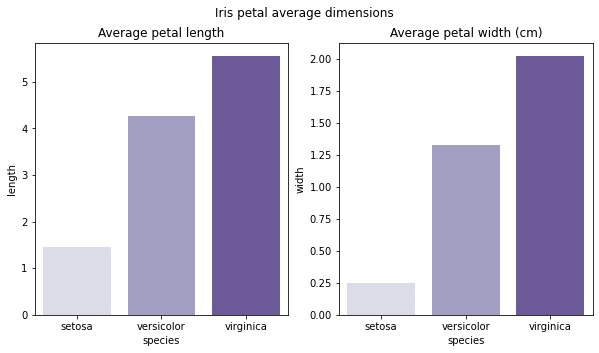

In [202]:
fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=False)
fig.suptitle('Iris petal average dimensions (cm)')

#petal length
sns.barplot(data=iris_petal_stats,x='species',y='length',ax=axes[0])
axes[0].set_title('Average petal length')
#petal width
sns.barplot(data=iris_petal_stats,x='species',y='width',ax=axes[1])
axes[1].set_title('Average petal width')

#note: catplot does not accept target axes. Hence, the use of barplot. 
#note: petal ratio is not included in the subplot because it does not have units. 

Text(0.5, 0.98, 'Average petal width vs length ratio')

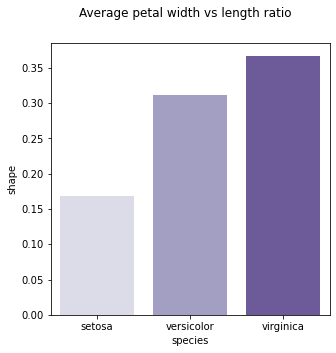

In [198]:
fig, axes = plt.subplots(1,1,figsize=(5,5),sharey=True)

#petal ratio
sns.barplot(data=iris_petal_stats,x='species',y='shape')
fig.suptitle('Average petal width vs length ratio')

From the above barplot, we can say that on average, setosa petals are wider than longer, while both versicolor and virginica have slimmer petals. 

In [201]:
#setting a dataframe containing averages for sepal dimensions
iris_sepal_stats = []
iris_sepal_stats = pd.DataFrame(iris_sepal_stats)
#creating sepal ratio 
iris['sepal_ratio']=iris['sepal_width']/iris['sepal_length']

#filling our empty dataframe 
iris_sepal_stats['shape']=iris.groupby('species')['petal_ratio'].mean()
iris_sepal_stats['length']=iris.groupby('species')['petal_length'].mean()
iris_sepal_stats['width']=iris.groupby('species')['petal_width'].mean()
iris_sepal_stats=iris_petal_stats.reset_index()

Text(0.5, 1.0, 'Average sepal width')

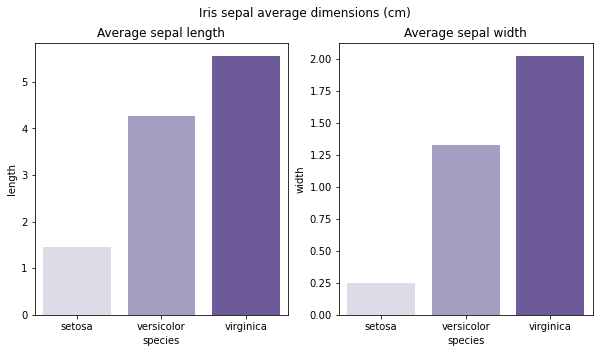

In [203]:
fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=False)
fig.suptitle('Iris sepal average dimensions (cm)')

#petal length
sns.barplot(data=iris_sepal_stats,x='species',y='length',ax=axes[0])
axes[0].set_title('Average sepal length')
#petal width
sns.barplot(data=iris_sepal_stats,x='species',y='width',ax=axes[1])
axes[1].set_title('Average sepal width')


Text(0.5, 0.98, 'Average petal width vs length ratio')

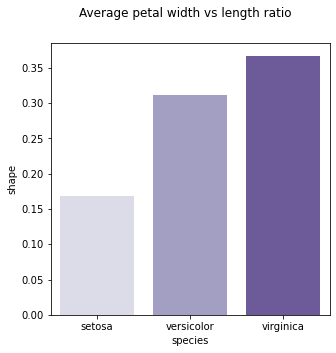

In [205]:
fig, axes = plt.subplots(1,1,figsize=(5,5),sharey=True)

#petal ratio
sns.barplot(data=iris_petal_stats,x='species',y='shape')
fig.suptitle('Average petal width vs length ratio')